# about the Dataset

The CIFAR-10 dataset is a widely used dataset in the field of computer vision and machine learning. It consists of 60,000 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. Each image is 32x32 pixels and has three color channels (red, green, and blue).

The 10 classes in the CIFAR-10 dataset represent different categories of objects:

1. **Airplane**
2. **Automobile**
3. **Bird**
4. **Cat**
5. **Deer**
6. **Dog**
7. **Frog**
8. **Horse**
9. **Ship**
10. **Truck**

Each class is mutually exclusive, meaning that there is no overlap between the classes. The CIFAR-10 dataset is often used to train and evaluate machine learning models for tasks such as image classification and object recognition.

# import needed libraries

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix



# laod the dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine train and test datasets
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

x_data_flat = x_data.reshape(x_data.shape[0], -1)
df = pd.DataFrame(x_data_flat)
df['label'] = y_data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [3]:
# # save the data in a csv file
# df.to_csv("cifar10.csv")

In [4]:
# get the max cell value in the dataset
max_val = df.max().max()
max_val

255

In [5]:
df["label"].value_counts()

label
6    6000
9    6000
4    6000
1    6000
2    6000
7    6000
8    6000
3    6000
5    6000
0    6000
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 3073 entries, 0 to label
dtypes: uint8(3073)
memory usage: 175.8 MB


# Exploratory Data Analysis (EDA)

## 1. Basic Information and Summary Statistics

In [7]:
# 1.1 Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (60000, 3073)


In [8]:
# 1.2 Data Types
print("\nData Types:\n", df.dtypes)


Data Types:
 0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
         ...  
3068     uint8
3069     uint8
3070     uint8
3071     uint8
label    uint8
Length: 3073, dtype: object


In [9]:
# 1.3 Missing Values
print("\nMissing Values:\n", df.isnull().sum().sum())


Missing Values:
 0


In [10]:
# 1.4 Summary Statistics
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,130.681517,136.054483,132.599833,130.115950,135.453867,131.916500,131.066200,136.314750,132.690150,131.665183,...,126.835533,125.771517,113.999500,126.557017,125.640983,114.051200,126.623950,125.875683,114.539400,4.500000
std,73.399021,72.871161,80.396639,72.434476,71.874016,79.529036,72.247946,71.668407,79.390742,71.970096,...,63.872536,61.470824,64.820143,64.112482,61.725727,65.162783,64.871664,62.544579,66.008946,2.872305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,77.000000,61.000000,71.000000,78.000000,61.000000,73.000000,79.000000,62.000000,73.000000,...,79.000000,81.000000,64.000000,79.000000,81.000000,64.000000,78.000000,80.000000,63.000000,2.000000
50%,128.000000,135.000000,128.000000,127.000000,135.000000,127.000000,128.000000,136.000000,128.000000,129.000000,...,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000,4.500000
75%,189.000000,195.000000,207.000000,188.000000,193.000000,206.000000,189.000000,194.000000,206.000000,189.000000,...,172.000000,167.000000,157.000000,172.000000,167.000000,157.000000,172.000000,168.000000,159.000000,7.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.000000


In [11]:
# 1.5 Distribution of Labels
label_distribution = df['label'].value_counts()
print("\nLabel Distribution:\n", label_distribution)


Label Distribution:
 label
6    6000
9    6000
4    6000
1    6000
2    6000
7    6000
8    6000
3    6000
5    6000
0    6000
Name: count, dtype: int64


# 2. Visualization

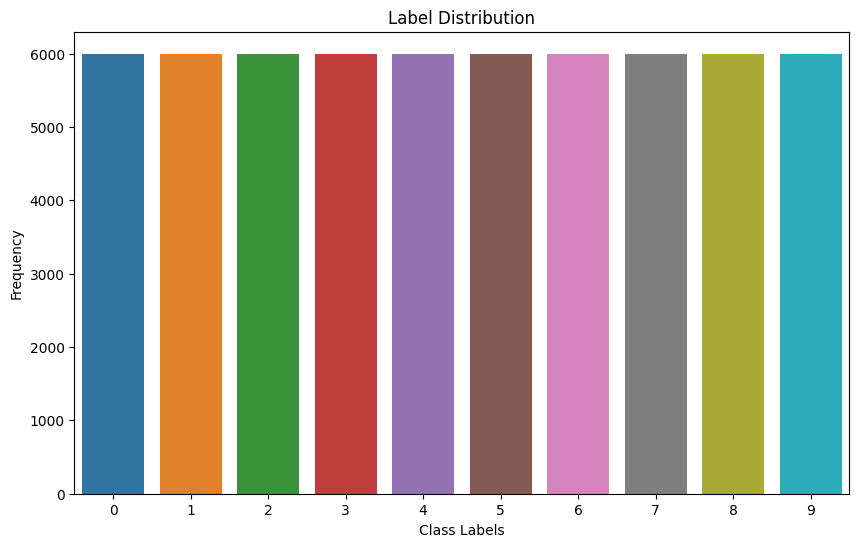

In [12]:
# 2.1 Label Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title("Label Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.show()

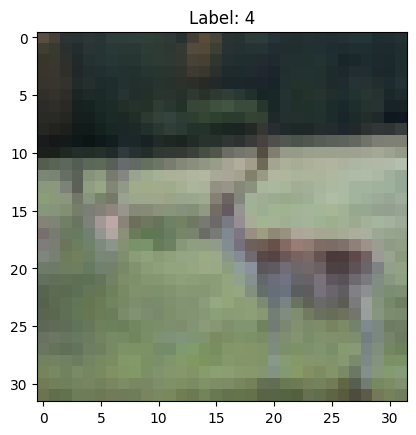

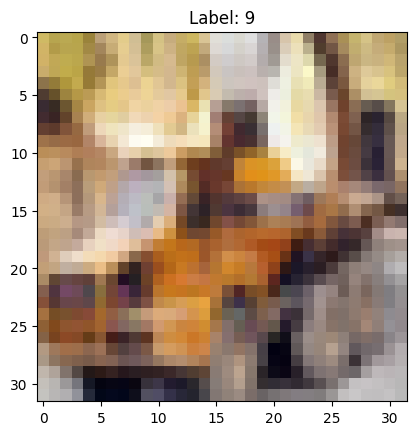

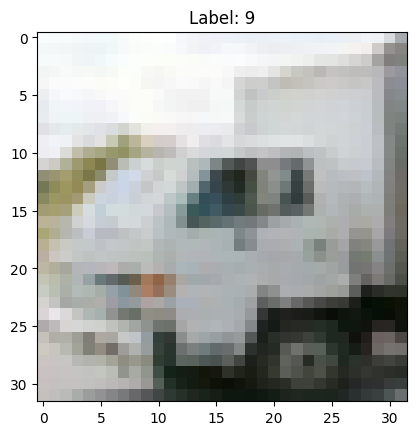

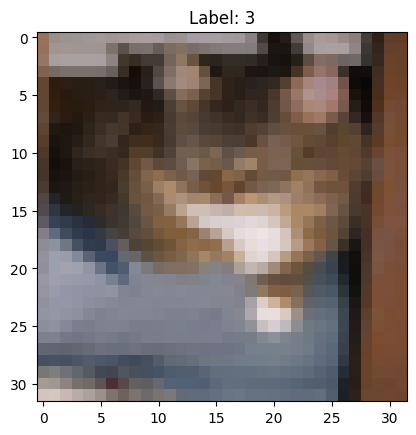

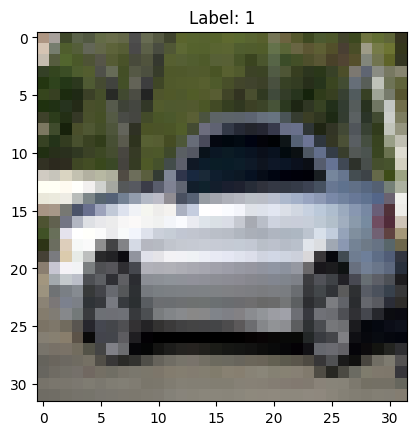

In [13]:
# 2.2 Sample Images
sample_images = df.sample(5)
for i, row in sample_images.iterrows():
    image_array = row[:-1].values.reshape(32, 32, 3)
    plt.imshow(image_array.astype('uint8'))
    plt.title(f"Label: {row['label']}")
    plt.show()

In [14]:
# # 2.5 Principal Component Analysis (PCA)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(df.iloc[:, :-1].values)
# df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
# df_pca['label'] = df['label']

# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='label', palette='tab10', data=df_pca, legend='full')
# plt.title("PCA Result")
# plt.show()

# 3. Pixel Value Analysis

In [15]:
# 3.1 Mean and Standard Deviation
pixel_mean = df.iloc[:, :-1].mean().mean()
pixel_std = df.iloc[:, :-1].std().mean()
print(f"\nMean Pixel Value: {pixel_mean}")
print(f"Standard Deviation of Pixel Values: {pixel_std}")


Mean Pixel Value: 120.84449672851561
Standard Deviation of Pixel Values: 63.29020189056246


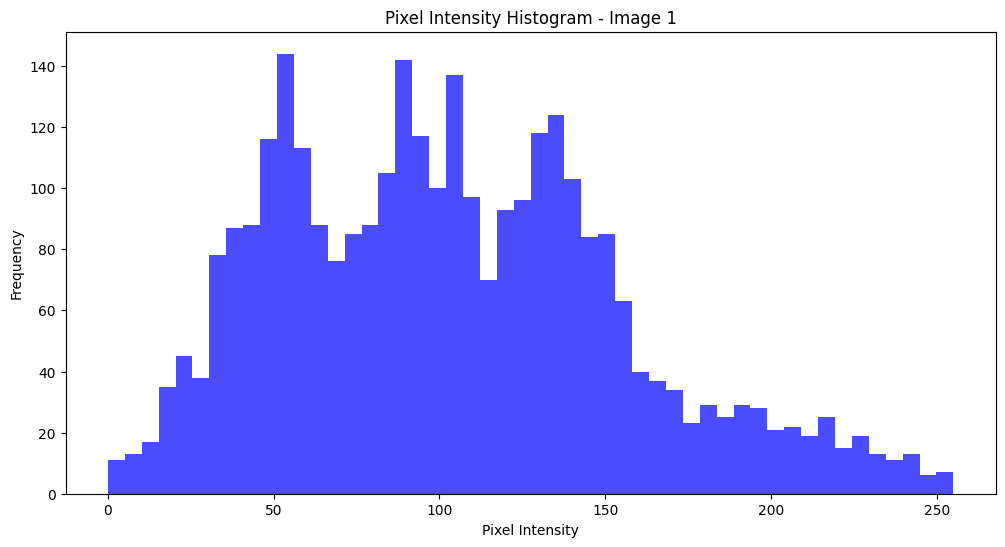

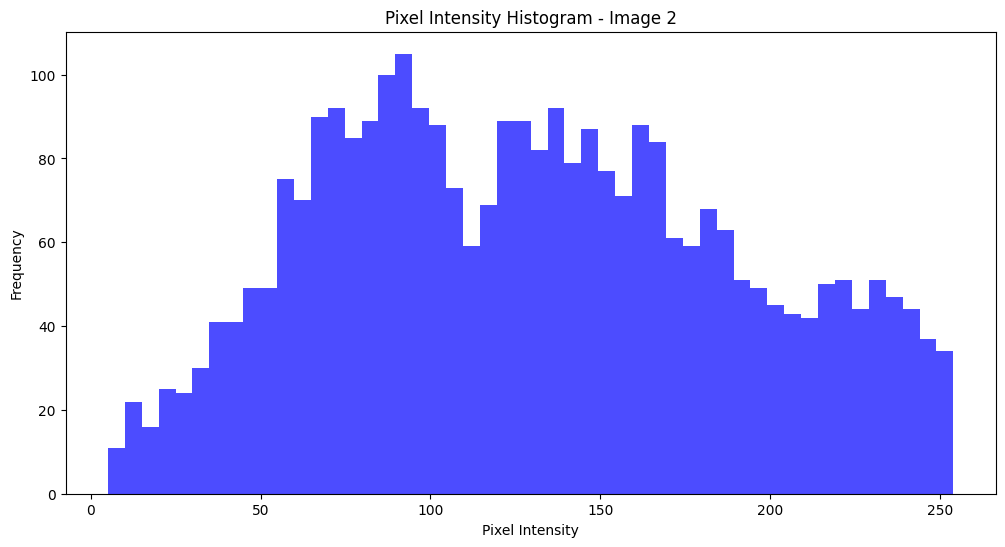

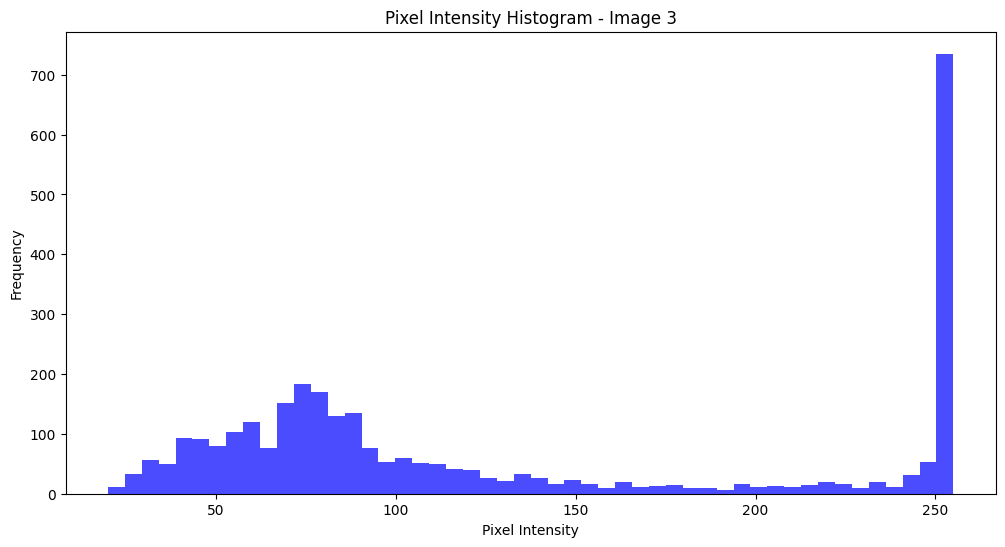

In [16]:
# 3.2 Pixel Intensity Histograms for Random Images
for i in range(3):
    image_array = df.iloc[i, :-1].values.reshape(32, 32, 3)
    plt.figure(figsize=(12, 6))
    plt.hist(image_array.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Histogram - Image {i+1}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# ML Classification

In [17]:
# Separate features and labels
X = df.iloc[:, :-1].values
y = df['label'].values

# 1. PCA for Dimensionality Reduction

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA, reduce to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# 2. Applying Classification Algorithms

## 2.1 Logistic Regression

In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

# Print Classification Report and Confusion Matrix
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.48      0.46      1200
           1       0.46      0.51      0.48      1200
           2       0.32      0.27      0.29      1200
           3       0.30      0.28      0.29      1200
           4       0.38      0.30      0.34      1200
           5       0.35      0.34      0.34      1200
           6       0.42      0.50      0.46      1200
           7       0.46      0.45      0.46      1200
           8       0.51      0.54      0.52      1200
           9       0.45      0.48      0.46      1200

    accuracy                           0.41     12000
   macro avg       0.41      0.41      0.41     12000
weighted avg       0.41      0.41      0.41     12000



Logistic Regression - Confusion Matrix:


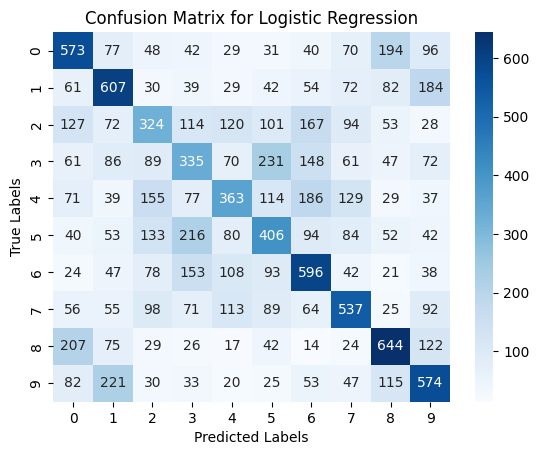

In [21]:
print("Logistic Regression - Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [22]:
# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_log_reg = cross_val_score(log_reg, X_pca, y, cv=cv, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean():.4f} ± {cv_scores_log_reg.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.4098 ± 0.0027


## 2.2 SVM

In [23]:
svm = SVC()
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Print Classification Report and Confusion Matrix
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1200
           1       0.65      0.67      0.66      1200
           2       0.41      0.39      0.40      1200
           3       0.37      0.37      0.37      1200
           4       0.45      0.43      0.44      1200
           5       0.48      0.41      0.44      1200
           6       0.52      0.60      0.56      1200
           7       0.63      0.56      0.60      1200
           8       0.68      0.68      0.68      1200
           9       0.60      0.66      0.62      1200

    accuracy                           0.54     12000
   macro avg       0.54      0.54      0.54     12000
weighted avg       0.54      0.54      0.54     12000



SVM - Confusion Matrix:


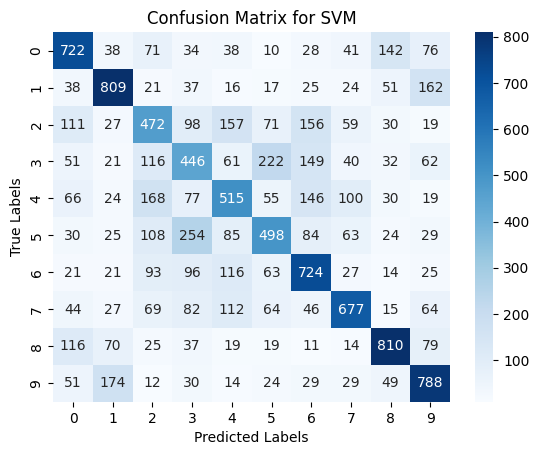

In [24]:
print("SVM - Confusion Matrix:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [25]:
# Cross-Validation
cv_scores_svm = cross_val_score(svm, X_pca, y, cv=cv, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {cv_scores_svm.mean():.4f} ± {cv_scores_svm.std():.4f}")

## 2.3 Random Forest

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Print Classification Report and Confusion Matrix
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1200
           1       0.46      0.58      0.52      1200
           2       0.35      0.29      0.32      1200
           3       0.28      0.24      0.26      1200
           4       0.40      0.39      0.39      1200
           5       0.36      0.34      0.35      1200
           6       0.45      0.50      0.48      1200
           7       0.51      0.41      0.45      1200
           8       0.57      0.60      0.59      1200
           9       0.46      0.50      0.48      1200

    accuracy                           0.44     12000
   macro avg       0.43      0.44      0.43     12000
weighted avg       0.43      0.44      0.43     12000



Random Forest - Confusion Matrix:


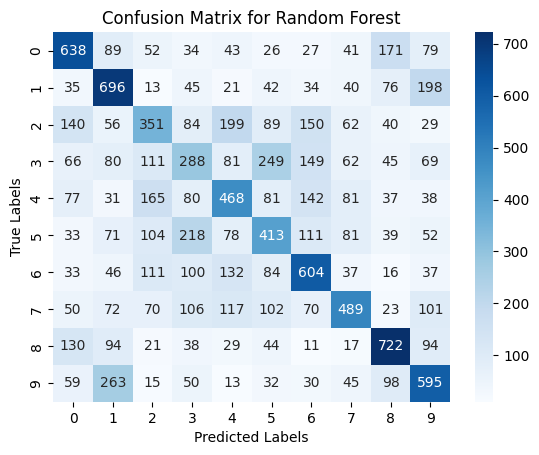

In [27]:
print("Random Forest - Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [28]:
# Cross-Validation
cv_scores_rf = cross_val_score(rf, X_pca, y, cv=cv, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

## 2.4 K-Nearest Neighbors

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Print Classification Report and Confusion Matrix
print("K-Nearest Neighbors - Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.56      0.46      1200
           1       0.65      0.27      0.38      1200
           2       0.23      0.43      0.30      1200
           3       0.32      0.22      0.26      1200
           4       0.23      0.45      0.30      1200
           5       0.43      0.23      0.30      1200
           6       0.33      0.33      0.33      1200
           7       0.68      0.25      0.36      1200
           8       0.44      0.65      0.52      1200
           9       0.76      0.17      0.28      1200

    accuracy                           0.36     12000
   macro avg       0.44      0.36      0.35     12000
weighted avg       0.44      0.36      0.35     12000



K-Nearest Neighbors - Confusion Matrix:


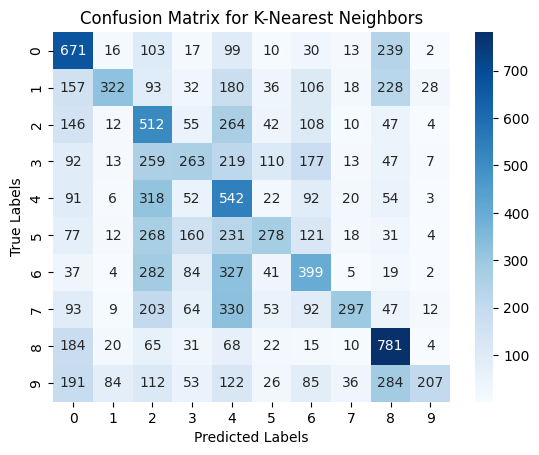

In [30]:
print("K-Nearest Neighbors - Confusion Matrix:")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [31]:
# Cross-Validation
cv_scores_knn = cross_val_score(knn, X_pca, y, cv=cv, scoring='accuracy')
print(f"K-Nearest Neighbors Cross-Validation Accuracy: {cv_scores_knn.mean():.4f} ± {cv_scores_knn.std():.4f}")

## 2.5 Gradient Boosting

In [32]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb.predict(X_test)

# Print Classification Report and Confusion Matrix
print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

In [ ]:
print("Gradient Boosting - Confusion Matrix:")
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Cross-Validation
cv_scores_gb = cross_val_score(gb, X_pca, y, cv=cv, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy: {cv_scores_gb.mean():.4f} ± {cv_scores_gb.std():.4f}")